<h1 class = 'Introduction'>Introduction</h1>
<p>This Project aims to detect the number png files which is established under python 3.6 </p>
<p>Data set: MNIST </p>
<p>Method: CNN</p>

<h1 class = 'package'> Package </h1>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from keras.utils import np_utils  
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

<h1 class = 'load data'> Load Data </h1>

In [2]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

# Translation of data  
X_train4D = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  
X_test4D = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

<h1 class = 'one hot'> One Hot Encoding </h1>

In [3]:
# Standardize feature data  
X_train4D_norm = X_train4D/255
X_test4D_norm = X_test4D/255

# Label Onehot-encoding  
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

<h1 class = 'CNN'> CNN Model</h1>

In [4]:
model = Sequential()
# Create CN layers1
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_1'))
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_2'))  
  
# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))  
  
# Add Dropout layer  
model.add(Dropout(0.25, name='dropout_1'))

<h1 class = 'Neural'> Establish Neural Network</h1>

In [5]:
# Flattern Layer
model.add(Flatten(name='flatten_1'))

# Hidden Layer
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_2'))

# Output
model.add(Dense(10, activation='softmax', name='dense_2'))

In [6]:
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 36)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1764)              0

<h1 class = 'Train'> Training Model </h1>

In [7]:
# Define methods of training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

train_history = model.fit(x=X_train4D_norm,  
                          y=y_trainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=1)

Epoch 1/10
160/160 [==============================] - 11s 68ms/step - loss: 0.5084 - accuracy: 0.8383 - val_loss: 0.1021 - val_accuracy: 0.9708
Epoch 2/10
160/160 [==============================] - 11s 68ms/step - loss: 0.1396 - accuracy: 0.9577 - val_loss: 0.0652 - val_accuracy: 0.9802
Epoch 3/10
160/160 [==============================] - 11s 69ms/step - loss: 0.0990 - accuracy: 0.9707 - val_loss: 0.0500 - val_accuracy: 0.9846
Epoch 4/10
160/160 [==============================] - 11s 71ms/step - loss: 0.0789 - accuracy: 0.9769 - val_loss: 0.0453 - val_accuracy: 0.9864
Epoch 5/10
160/160 [==============================] - 12s 72ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 6/10
160/160 [==============================] - 12s 73ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0368 - val_accuracy: 0.9898
Epoch 7/10
160/160 [==============================] - 12s 72ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0349 - val_accuracy:

<h1 class = 'Result'> Result </h1>

In [8]:
import matplotlib.pyplot as plt  

def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
  
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

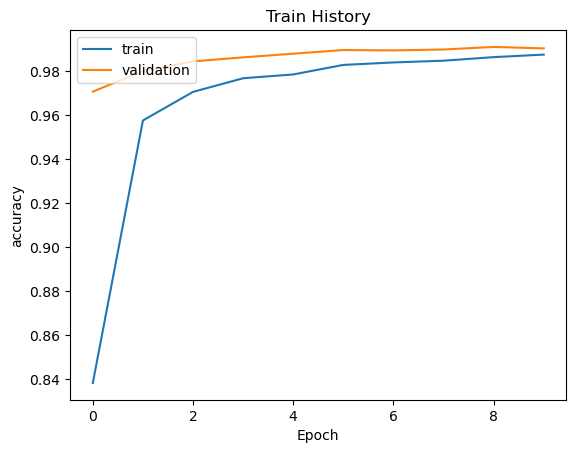

In [9]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

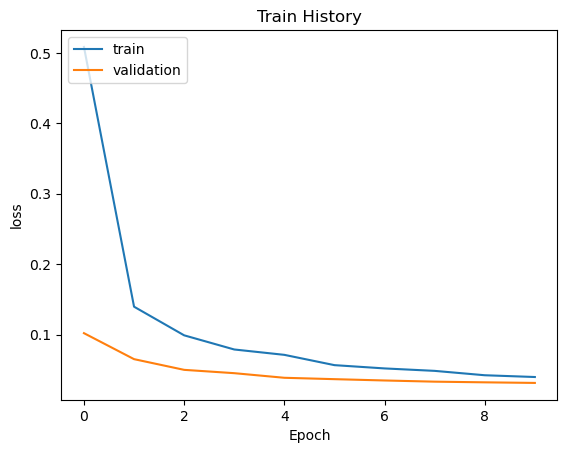

In [10]:
show_train_history(train_history, 'loss', 'val_loss')

<h1 class = 'Prediction'> Prediction </h1>

In [11]:
scores = model.evaluate(X_test4D_norm, y_testOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.9920

	[Info] Accuracy of testing data = 99.2%


In [12]:
# Prediction
print("\t[Info] Making prediction of X_Test4D_norm")  
predict_x=model.predict(X_test4D_norm) 
prediction=np.argmax(predict_x,axis=1) 
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test4D_norm
313/313 [==============================] - 1s 3ms/step

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 6 4 2]



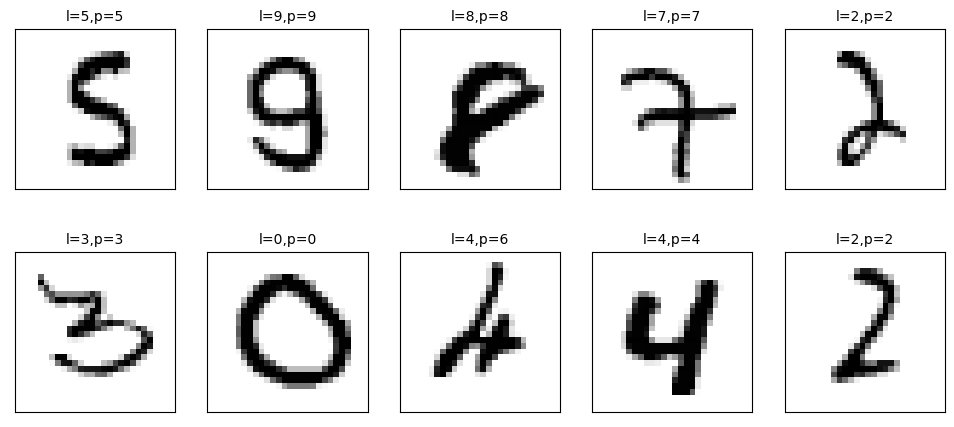

In [13]:
plot_images_labels_predict(X_test, y_test, prediction, idx=240)